In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [4]:
data = pd.read_csv("cust_satisfaction.csv")
data.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [5]:
data.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.duplicated().sum()

np.int64(172)

In [8]:
data.drop_duplicates()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [9]:
data["Customer Type"].value_counts()

Customer Type
Loyal Customer       84662
disloyal Customer    18932
Name: count, dtype: int64

In [10]:
loyal_customer = data[data["Customer Type"] == "Loyal Customer"]
disloyal_customer = data[data["Customer Type"] == "disloyal Customer"]


In [11]:
loyal_customer = loyal_customer.sample(20000)
loyal_customer.shape

(20000, 12)

In [12]:
balance_pf = pd.concat([loyal_customer,disloyal_customer])

In [13]:
cat_col = balance_pf.select_dtypes("object")
num_col=balance_pf.select_dtypes(exclude="O")
cat_col.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction
50300,Male,Loyal Customer,Business travel,Business,satisfied
84743,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
10149,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
25526,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
93108,Female,Loyal Customer,Business travel,Business,satisfied


In [14]:
pd.get_dummies(cat_col)

,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_neutral or dissatisfied,satisfaction_satisfied
50300,False,True,True,False,True,False,True,False,False,False,True
84743,False,True,True,False,False,True,False,True,False,True,False
10149,False,True,True,False,False,True,False,True,False,True,False
25526,False,True,True,False,False,True,False,False,True,True,False
93108,True,False,True,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
103892,True,False,False,True,True,False,True,False,False,True,False
103895,True,False,False,True,True,False,False,True,False,True,False
103899,True,False,False,True,True,False,False,True,False,True,False
103901,False,True,False,True,True,False,True,False,False,True,False


In [15]:
## encoding categorical data
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
ohe = OneHotEncoder(drop="if_binary")
cat_col_encoded = ohe.fit_transform(cat_col).toarray()
cat_col_encoded

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]], shape=(38932, 7))

In [16]:
column_name = ohe.get_feature_names_out()
column_name

array(['Gender_Male', 'Customer Type_disloyal Customer',
       'Type of Travel_Personal Travel', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'satisfaction_satisfied'], dtype=object)

In [17]:
one_hot = pd.DataFrame(cat_col_encoded,columns=column_name)
one_hot.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [18]:
one_hot = one_hot.reset_index(drop=True)
num_col = num_col.reset_index(drop=True)
final_df = pd.concat([one_hot,num_col],axis=1)
final_df.head()

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,52,3976,5,5,4,5,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,39,569,1,5,1,0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,55,1788,4,4,4,0,11.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,32,116,3,1,3,0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,57,3841,5,4,5,0,14.0


In [19]:
##
final_df.to_csv("cleaned_cust_satisfaction.csv",index=False)

In [20]:
x = final_df.drop("Customer Type_disloyal Customer",axis=1)
y = final_df[["Customer Type_disloyal Customer"]]

In [21]:
## split data into train and test 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
## logistic regression
model = LogisticRegression(max_iter=10000)
model.fit(x_train,y_train)

/Users/priyanshubansal/developer/training/notebookenv/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [23]:
model.score(x_train,y_train)


0.8773478889067265

In [24]:
metrix = final_df.corr()


In [25]:
metrix

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
Gender_Male,1.000000,-0.037754,0.009349,0.027002,-0.008854,-0.038193,0.024674,0.016234,0.022280,0.005539,0.026407,0.008052,0.009506,0.007855
Customer Type_disloyal Customer,-0.037754,1.000000,-0.465148,-0.108254,0.148725,-0.087496,-0.249646,-0.381164,-0.328145,-0.142196,0.027770,-0.106385,0.001182,0.001672
Type of Travel_Personal Travel,0.009349,-0.465148,1.000000,-0.382531,0.328966,0.108549,-0.267387,0.079629,-0.125402,-0.068297,-0.029216,-0.027395,-0.002075,-0.001887
Class_Business,0.027002,-0.108254,-0.382531,1.000000,-0.888575,-0.222984,0.443152,0.170046,0.376292,0.134653,0.240413,0.092325,-0.017228,-0.022026
Class_Eco,-0.008854,0.148725,0.328966,-0.888575,1.000000,-0.249045,-0.402342,-0.176279,-0.336424,-0.126034,-0.206733,-0.085473,0.018676,0.022477
Class_Eco Plus,-0.038193,-0.087496,0.108549,-0.222984,-0.249045,1.000000,-0.080608,0.015591,-0.079527,-0.016457,-0.068254,-0.013287,-0.003314,-0.001262
satisfaction_satisfied,0.024674,-0.249646,-0.267387,0.443152,-0.402342,-0.080608,1.000000,0.124819,0.271369,0.283705,0.220326,0.213788,-0.040084,-0.048236
Age,0.016234,-0.381164,0.079629,0.170046,-0.176279,0.015591,0.124819,1.000000,0.141606,0.084904,-0.043263,0.059884,-0.003540,-0.005802
Flight Distance,0.022280,-0.328145,-0.125402,0.376292,-0.336424,-0.079527,0.271369,0.141606,1.000000,0.117628,0.048848,0.084539,-0.000840,-0.007440
Inflight entertainment,0.005539,-0.142196,-0.068297,0.134653,-0.126034,-0.016457,0.283705,0.084904,0.117628,1.000000,0.240405,0.798298,-0.016210,-0.020715


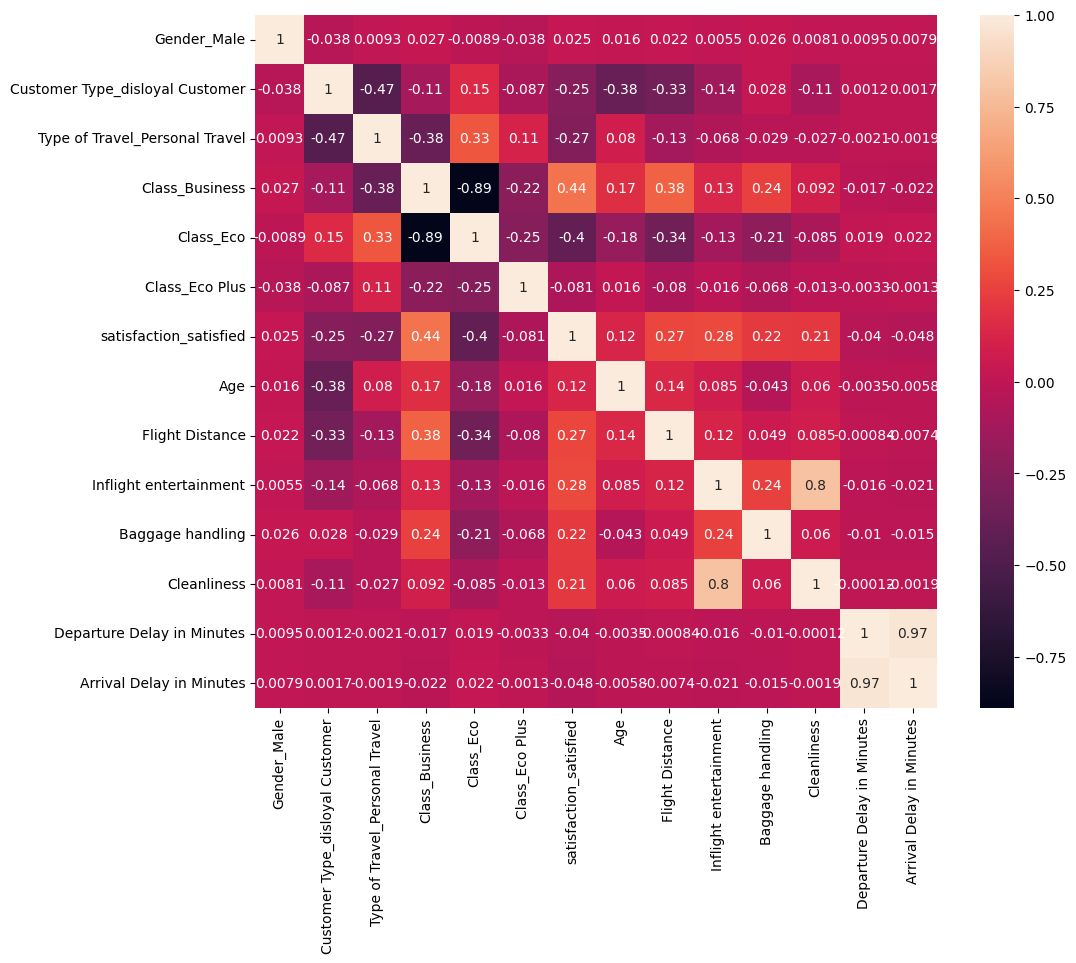

In [26]:
plt.figure(figsize=(11,9))
sns.heatmap(metrix,annot=True)
plt.show()


In [27]:
pred = model.predict(x_test)
y_test["prediction"] = pred
y_test

,Customer Type_disloyal Customer,prediction
22284,1.0,1.0
5325,0.0,0.0
323,0.0,0.0
3318,0.0,0.0
38287,1.0,1.0
...,...,...
38825,1.0,1.0
3839,0.0,0.0
33071,1.0,1.0
5436,0.0,1.0


In [28]:
y_pred=model.predict(x_test)

In [29]:
from sklearn.metrics import confusion_matrix , classification_report


In [30]:
confusion_matrix(y_test["Customer Type_disloyal Customer"], y_test["prediction"])



array([[3471,  560],
       [ 396, 3360]])

<Axes: >

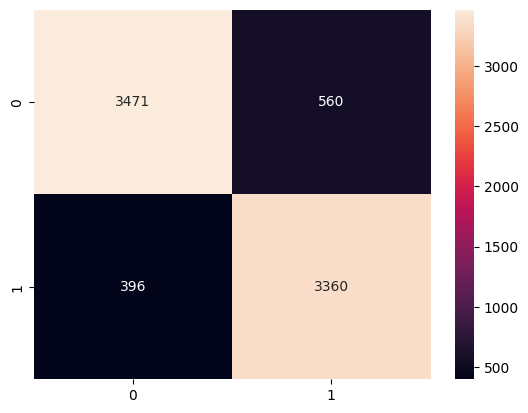

In [31]:
## heatmap of confusion matrix
sns.heatmap(confusion_matrix(y_test["Customer Type_disloyal Customer"],y_test["prediction"]),annot=True,fmt="d")

In [32]:
## classification report 

print(classification_report(y_test["Customer Type_disloyal Customer"],y_test["prediction"]))

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88      4031
         1.0       0.86      0.89      0.88      3756

    accuracy                           0.88      7787
   macro avg       0.88      0.88      0.88      7787
weighted avg       0.88      0.88      0.88      7787

